# Comparing Build-in Aggregation Schemes

This example demonstrates the comparison of eight build-in aggregation schemes. We draw 100 samples from two normal distributions with different mean and co-variance. The samples are then aggregated using the build-in aggregation rules.

In [1]:
import torch
from blades.client import BladesClient
from blades.aggregators import Krum, Median, Geomed, Autogm, Mean, Clustering, Trimmedmean, Clippedclustering
# sphinx_gallery_thumbnail_path = '../../_static/demo.png'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import skew
import scipy.stats as st
from sklearn.datasets import make_blobs

plt.rcParams['axes.linewidth'] = 1.5 #set the value globally
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 16
plt.rcParams["axes.labelweight"] = "bold"

In [3]:
np.random.seed(1)
sz = 40
sample_sz = 80

mean = np.array((0, 0))
cov = [[20, 0], [0, 20]]
benign = np.random.multivariate_normal(mean, cov, 60)
mean = np.array((30, 30))
cov = [[60, 0], [0, 60]]
outliers = np.concatenate([np.random.multivariate_normal(mean, cov, 40)])
all_data = np.concatenate([benign, outliers])

all_data_tensor = torch.Tensor(np.concatenate([benign, outliers]))


aggs = [Mean(),
        Krum(len(all_data), len(outliers)),
        Geomed(),
        Median(),
        Autogm(lamb=1.0),
        Trimmedmean(num_byzantine=len(outliers)),
        Clustering(),
        Clippedclustering(),
       ]

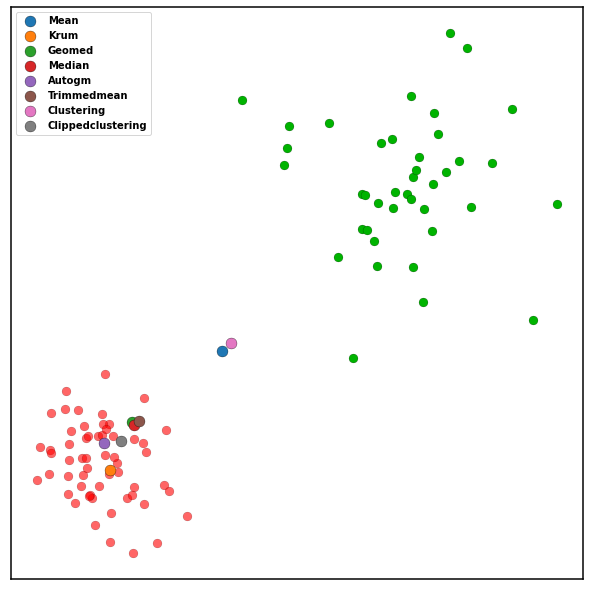

In [4]:
fig, axs = plt.subplots(figsize=(8,8))


ax = axs
ax.scatter(benign[:, 0], benign[:, 1], s=sample_sz, alpha=0.6, color='r', linewidths=0.2, edgecolors='black')
ax.scatter(outliers[:, 0], outliers[:, 1], s=sample_sz, color=[0.,  0.7, 0.,  1. ], linewidths=0.2, edgecolors='black')

def plot_agg(ax, agg):
    target = agg(all_data_tensor).cpu().detach().numpy()
    ax.scatter(target[0], target[1], s=sz * 3, label=type(agg).__name__, linewidths=0.3, edgecolors='black')

list(map(lambda agg: plot_agg(ax, agg), aggs))
ax.set_xticks([])
ax.set_yticks([])
ax.legend()

fig.tight_layout(pad=0.0, w_pad=0.6, h_pad=0.5)
# plt.savefig('../../_static/demo.png')

In this example, the results of **Mean** and **Clustering** deviated away by the outliers. All the other are in side the range of benign data